In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout,Input,Activation,Dense
from tensorflow.keras.models import Sequential,Model,load_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

In [2]:
modelpath = './models/02_02___.h5'
es = EarlyStopping(monitor='val_loss',patience=100)
cp = ModelCheckpoint(monitor = 'val_loss',filepath=modelpath)

#df = pd.read_csv("train.csv",index_col=[0])
df = pd.read_csv("train.csv",index_col=[0])
y = df.values[:,0]
x = df.values[:,2:].astype('float32')/255.0#.reshape(-1,28,28)
print(x.shape,y.shape)
# (2048, 28, 28) (2048,)

#pca = PCA()
#pca.fit(x)
#cumsum = np.cumsum(pca.explained_variance_ratio_)
#d = np.argmax(cumsum>0.991)+1 # 0.991 에서 d는 289=17^2
#print(d)
#pca1 = PCA(n_components=d)
#x = pca1.fit_transform(x)
onehot = OneHotEncoder()
y = onehot.fit_transform(y.reshape(-1,1)).toarray().astype('float32')

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.15)
x_train = x_train.reshape(-1,28,28,1)#[:,2:26,2:26,:]
x_val = x_val.reshape(-1,28,28,1)#[:,2:26,2:26,:]
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)


(2048, 784) (2048,)
(1740, 28, 28, 1) (308, 28, 28, 1) (1740, 10) (308, 10)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Flatten,Dropout,Input,Activation,Dense
from tensorflow.keras.models import Sequential,Model,load_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

modelpath = './models/test_loss.h5'
es = EarlyStopping(monitor='val_loss',patience=100)
cp = ModelCheckpoint(monitor = 'val_loss',filepath=modelpath,save_best_only=True)
cp2 = ModelCheckpoint(monitor = 'val_accuracy',filepath='./models/test_accuracy.h5',save_best_only=True)

#df = pd.read_csv("train.csv",index_col=[0])
df = pd.read_csv("train.csv",index_col=[0])
y = df.values[:,0]
x = df.values[:,2:].astype('float32')/255.0#.reshape(-1,28,28)
print(x.shape,y.shape)
# (2048, 28, 28) (2048,)

#pca = PCA()
#pca.fit(x)
#cumsum = np.cumsum(pca.explained_variance_ratio_)
#d = np.argmax(cumsum>0.991)+1 # 0.991 에서 d는 289=17^2
#print(d)
#pca1 = PCA(n_components=d)
#x = pca1.fit_transform(x)
# onehot = OneHotEncoder()
y = onehot.fit_transform(y.reshape(-1,1)).toarray().astype('float32')

x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.15)
x_train = x_train.reshape(-1,28,28,1)#[:,2:26,2:26,:]
x_val = x_val.reshape(-1,28,28,1)#[:,2:26,2:26,:]
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)

# # 기존 내꺼
# # inputs = Input(shape = (28,28,1))
# # layers = Conv2D(filters = 2048,kernel_size=3)(inputs)
# # layers = Conv2D(filters = 1024,kernel_size=3)(layers)
# # layers = BatchNormalization()(layers)
# # layers = Activation('relu')(layers)
# # layers = MaxPooling2D(pool_size=2)(layers)
# # layers = Conv2D(filters = 256,kernel_size=2)(inputs)
# # layers = BatchNormalization()(layers)
# # layers = Activation('relu')(layers)
# # layers = MaxPooling2D(pool_size=2)(layers)
# # layers = Conv2D(filters = 64,kernel_size=2)(layers)
# # layers = BatchNormalization()(layers)
# # layers = Activation('relu')(layers)
# # layers = MaxPooling2D(pool_size=2)(layers)
# # layers = Conv2D(filters = 16,kernel_size=2)(layers)
# # layers = BatchNormalization()(layers)
# # layers = Activation('relu')(layers)
# # layers = Flatten()(layers)
# # layers = Dense(2048,activation='relu')(layers)
# # outputs = Dense(10,activation='softmax')(layers)
# # model = Model(inputs=inputs,outputs=outputs)
print(type(x_train),type(x_val),type(y_train),type(y_val))

model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])
model.fit(x_train,y_train,validation_data = (x_val,y_val),epochs=300,callbacks=[cp,es,cp2],batch_size=4)

(2048, 784) (2048,)
(1740, 28, 28, 1) (308, 28, 28, 1) (1740, 10) (308, 10)
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Epoch 1/300
435/435 [==============================] - 17s 40ms/step - loss: 3.2818 - accuracy: 0.1063 - val_loss: 19.2954 - val_accuracy: 0.0747
Epoch 2/300
 59/435 [===>..........................] - ETA: 12s - loss: 2.3460 - accuracy: 0.1271

In [ ]:
'''
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)

'''

In [ ]:
'''
0.87
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)
'''

In [ ]:
'''
inputs = Input(shape=(28,28,1))
x = inputs
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = _x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(128,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(256,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
_x = Conv2D(512,3,padding='same')(x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
_x = Conv2D(128,3,padding='same')(_x)
_x = BatchNormalization()(_x)
_x = Activation('relu')(_x)
x = x+_x
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(2048)(x)
x = Dense(10,activation='softmax')(x)
outputs=x
model = Model(inputs=inputs,outputs=outputs)
'''

In [10]:
model = load_model('./models/02_03_imger_best_index_4.h5')
df = pd.read_csv("test.csv",index_col=[0])
x_test = df.values[:,1:].reshape(-1,28,28).astype('float32')/255.0
x_test.shape

(20480, 28, 28)

In [11]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=-1)
df_sub = pd.read_csv('submission.csv',index_col=0)
df_sub['digit'] = y_pred
df_sub.to_csv('k_fold_4.csv')
y_pred

array([6, 9, 8, ..., 6, 3, 0], dtype=int64)

In [26]:
binary_model = []
for i in range(0,10):
    print(i)
    model = load_model('./binary_models/{}_binary.h5'.format(i))
    binary_model.append(model)



0
1
2
3
4
5
6
7
8
9


In [31]:
y_pred = model.predict(x_test)

def ordering(array):
    temp = array.copy()
    result = []
    for i in range(len(temp)):
        sol = np.argmax(temp)
        result.append(sol)
        temp[sol]=0
    return np.array(result)

In [32]:
y_pred

array([[7.6569414e-08, 2.2260668e-08, 4.6740688e-06, ..., 2.5446711e-10,
        5.9703314e-07, 5.4656005e-11],
       [2.9817595e-16, 2.0647546e-12, 4.4424861e-16, ..., 2.6480063e-10,
        8.9294266e-11, 1.0000000e+00],
       [2.4707546e-05, 1.3310514e-01, 8.9886552e-03, ..., 9.1972132e-04,
        1.2284001e-02, 2.9377347e-06],
       ...,
       [8.6063210e-09, 7.5784501e-10, 2.6377617e-10, ..., 3.1178827e-13,
        1.2005766e-07, 6.1626551e-15],
       [1.0054513e-03, 2.9064235e-01, 1.6038346e-05, ..., 1.7447629e-06,
        8.1512779e-03, 4.5916289e-03],
       [9.9825722e-01, 6.9838888e-16, 2.4161539e-10, ..., 1.8471900e-15,
        6.6174334e-13, 1.4705076e-15]], dtype=float32)

In [4]:
y_notyet = np.argmax(y_pred,axis=-1)
y_notyet


NameError: name 'y_pred' is not defined

In [15]:
binary_model[3].predict(x_test[0:2])

array([[3.88120088e-36],
       [1.13777095e-36]], dtype=float32)

In [18]:
y_pred = model.predict(x_train)

NameError: name 'x_train' is not defined

In [ ]:
k=729

In [107]:
k+=1
for i in [k]:
    temp_result = y_notyet[i]
    binary_result = binary_model[temp_result].predict(np.array([x_test[i].reshape(28,28,1)]))
    a=np.round(y_pred[i],3)
    print("원래모델 : ",temp_result,'\n원래모델확률 : ',a,"\n바이너리 : ",binary_result[0][0])
    print("0",binary_model[0].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("1",binary_model[1].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("2",binary_model[2].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("3",binary_model[3].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("4",binary_model[4].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("5",binary_model[5].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("6",binary_model[6].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("7",binary_model[7].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("8",binary_model[8].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])
    print("9",binary_model[9].predict(np.array([x_test[i].reshape(28,28,1)]))[0][0])


원래모델 :  9 
원래모델확률 :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] 
바이너리 :  1.6463632e-24
0 0.0
1 5.6854813e-21
2 0.0
3 0.0
4 3.455557e-05
5 0.0
6 0.0
7 0.0
8 1.2415284e-22
9 1.6463632e-24


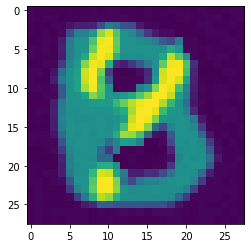

In [108]:
plt.imshow(x_test[k])
plt.show()

NameError: name 'y_pred' is not defined

In [5]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=-1)
df_sub = pd.read_csv('submission.csv',index_col=0)
df_sub['digit'] = y_pred
df_sub.to_csv('test_5.csv')
y_pred

KeyboardInterrupt: 

array([6, 9, 8, ..., 6, 8, 0], dtype=int64)

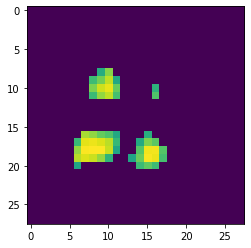

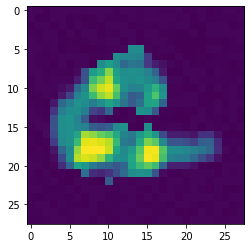

In [223]:
k=5
df = pd.read_csv("preprocessing_150.csv",index_col=[0])
df2 = pd.read_csv("train.csv",index_col=[0])
plt.imshow(df.values[k,2:].reshape(28,28).astype('float32'))
plt.show()
df2 = pd.read_csv("train.csv",index_col=[0])
plt.imshow(df2.values[k,2:].reshape(28,28).astype('float32'))
plt.show()

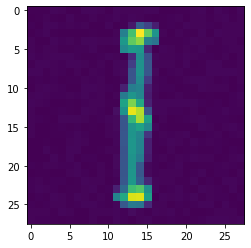

In [ ]:
inputs = Input(shape=(28,28,1))
conv1_1 = Conv2D(64,kernel_size=7)